# NYU FINAL PROJECT

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2


from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
from keras.datasets import cifar10
from keras import regularizers


Using TensorFlow backend.


In [0]:
#splitting the data set into training and test
cifar10 = tf.keras.datasets.cifar10
(training_images, training_labels), (test_images, test_labels) = cifar10.load_data()

#normalizing the data set so scaling is only from 0-1
training_images_scale = training_images/255
test_images_scale = test_images/255



170500096/170498071 [==============================] - 2s 0us/step


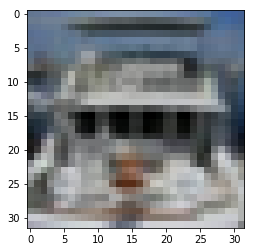

In [0]:
img1 = training_images[723, :, :, :]
plt.imshow(img1)


In [0]:
#function for turning images from rgb to BW
def rgb2gray(rgb): 
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

#first we convert the image to array ***WHY DO WE DO THIS??
gray_train = np.zeros((50000, 32, 32)) 
#create a for loop so that all the images in the data set can run through it and conver to BW
for i in range(0, 50000):
  gray_train[i, :, :] = rgb2gray(training_images_scale[i,:,:,:])
#reshape the images to add a FOURTH DIMESNION  - 1 channel **** WHY DO WE DO THIS??? 
gray_train = gray_train.reshape(50000, 32, 32, 1)
  
gray_test = np.zeros((10000, 32, 32))
for i in range(0, 10000):
  gray_test[i, :, :] = rgb2gray(test_images_scale[i,:,:,:])
  
gray_test = gray_test.reshape(10000, 32, 32, 1)



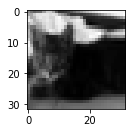

In [16]:
plt.subplot(1, 2, 1)
plt.imshow(training_images_scale[9, :, :, :])

plt.subplot(1, 2, 2)
plt.imshow(gray_train[9,:,:, 0]) #even though the image is blue and green, this is how the computer sees it as BW, if we want to as humans see the BW, we can add cmap = 'gray'

plt.subplot(1, 2, 3)
plt.imshow(gray_train[9,:,:, 0], cmap = 'gray')


In [0]:
K.clear_session()
#padding is 'same' because we want to maintain the shape of the image throughout the model because we are not trying to 
#alter the size
#the conv layers extract the important features and the upsampling years add back to insert image features 
model = tf.keras.models.Sequential ([
    tf.keras.layers.Conv2D(32, (4,4), activation = 'relu', input_shape = (32, 32, 1), padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (4,4), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(64, (4,4), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (4,4), activation = 'relu', padding = 'same'),
    tf.keras.layers.UpSampling2D(size=(2, 2), data_format=None, interpolation='nearest'),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    tf.keras.layers.UpSampling2D(size=(2, 2), data_format=None, interpolation='nearest'),
    tf.keras.layers.Conv2D(3, (4,4), activation = 'sigmoid', padding = 'same')
])


W0719 14:08:30.867256 139783677433728 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        32832     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        65600     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          65600     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 64)        0

In [0]:
opt = tf.keras.optimizers.Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'mse', metrics = ['mae'])

In [10]:
hist = model.fit(gray_train, training_images_scale, epochs = 15, batch_size = 32, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 33s 738us/sample - loss: 0.0109 - mean_absolute_error: 0.0750 - val_loss: 0.0081 - val_mean_absolute_error: 0.0644
Epoch 2/15
45000/45000 [==============================] - 31s 682us/sample - loss: 0.0077 - mean_absolute_error: 0.0624 - val_loss: 0.0079 - val_mean_absolute_error: 0.0648
Epoch 3/15
45000/45000 [==============================] - 32s 700us/sample - loss: 0.0071 - mean_absolute_error: 0.0594 - val_loss: 0.0068 - val_mean_absolute_error: 0.0582
Epoch 4/15
45000/45000 [==============================] - 31s 697us/sample - loss: 0.0068 - mean_absolute_error: 0.0576 - val_loss: 0.0065 - val_mean_absolute_error: 0.0562
Epoch 5/15
45000/45000 [==============================] - 32s 711us/sample - loss: 0.0065 - mean_absolute_error: 0.0564 - val_loss: 0.0070 - val_mean_absolute_error: 0.0585
Epoch 6/15
45000/45000 [==============================] - 32s 703us/sample - loss: 0.0

In [11]:
yhat = model.predict(gray_test)
mae = np.mean(np.abs(yhat - test_images_scale))
print(mae)
mse = np.mean((yhat - test_images_scale))
print(mse)

0.05358146907485232
0.012770654254594397


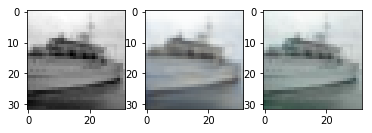

In [12]:
index = 80

plt.subplot(1, 3, 1)
plt.imshow(gray_test[index, :, :, 0], cmap = 'gray')

plt.subplot(1, 3, 2)
plt.imshow(yhat[index, :, : , :])

plt.subplot(1, 3, 3)
plt.imshow(test_images_scale[index, :, :, :])

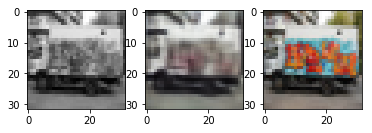

In [13]:
index = 349

plt.subplot(1, 3, 1)
plt.imshow(gray_test[index, :, :, 0], cmap = 'gray')

plt.subplot(1, 3, 2)
plt.imshow(yhat[index, :, : , :])

plt.subplot(1, 3, 3)
plt.imshow(test_images_scale[index, :, :, :])

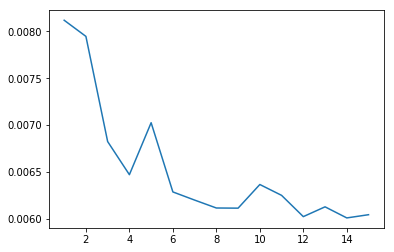

In [14]:
loss = hist.history['val_loss']
plt.plot(np.arange(1, 16), loss)

(1425, 1900, 3)


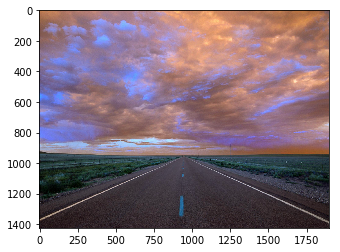

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

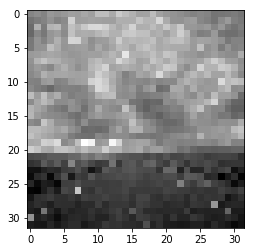

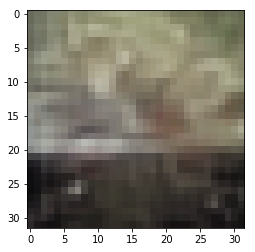

In [23]:
#if we want to choose our image and run it through the model
img1 = cv2.imread('landscape.jpg') #reads the image
img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)/255 #converts the image to grayscale

plt.imshow(img1)
print(img1.shape)
plt.figure()
#plt.imshow(img1[1:32,1:32,:])
plt.figure()
img = cv2.resize(img,(32,32)) #resizes the grayscale image
plt.figure()
plt.imshow(img,'gray') #plots the grayscale image

img = img.reshape(1,32,32,1) #reshapes the grayscale image so it can go through the model
yhat1 = model.predict(img) #runs the image through the model
plt.figure()
plt.imshow(yhat1.reshape(32,32,3))